# COMP0078 Supervised Learning - Coursework 1 {-}

### Student ID: 18006555  {-}

In [1]:
# Importing Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from matplotlib.colors import ListedColormap
from numpy.linalg import pinv
from tqdm.auto import tqdm
from joblib import Parallel, delayed, parallel_backend
from IPython.display import display, Markdown, Math, Latex
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# PART I

## 1.1 Linear Regression

## Question 1 {-}


We start with a small data set of points $S = \{(1,3), (2,2), (3,0), (4,5)\}$.

In [2]:
# Defining NumPy array of 4 data points within S
S_0 = np.array([(1,3), (2,2), (3,0), (4,5)])

# Splitting S_0 into x and y vectors
x_0, y_0 = np.split(S_0, [-1], axis=1)

By using the polynomial basis ${\phi}$ = $(\phi_1(x) = 1, \phi_2(x) = x, \cdots , \phi_k(x) = x^{k-1} )$ of dimension $k$ (order $k-1$), we can fit the data set $S$ with varying $k = 1,2,3,4$.

We denote the input data $\bf{x}$ = $(1,2,3,4)^T$ and the output $\bf{y}$ = $(3,2,0,5)^T$, split from the original $S$ data set. We transform $\bf{x}$ via the basis functions $(\phi_1, \cdots, \phi_k)$  $(k=1,2,3,4$), with our $\Phi$ defined as follows:
$$\Phi = \begin{bmatrix} {\phi}(x_1) \\ \vdots \\ {\phi}(x_4) \end{bmatrix} = \begin{bmatrix} \phi_1(x_1) & \ldots & \phi_k(x_1) \\ \vdots & \ddots & \vdots \\ \phi_1(x_m) & \ldots & \phi_k(x_m) \end{bmatrix} = \begin{bmatrix} 1 & {x_1} & \ldots & {x_1}^{k-1} \\ 1 & x_2 & \ldots & {x_2}^{k-1} \\ 1 & x_3 & \ldots & {x_3}^{k-1}\\ 1 & x_4 & \ldots & {x_4}^{k-1} \end{bmatrix}$$
where $m = 4$ is the number of data points.

In [3]:
# Creating function to create Phi (capital) design matrix
def phi_k(x,k):
    
    # Pre-allocation of PHI matrix with no of data points as no. of rows, and k columns for each basis term
    PHI = np.array(np.zeros((x.shape[0], k)))
    
    # For loop to replace rows of PHI with powers of data points as above
    for i in range(k):
        PHI[:,i:i+1] = x**(i)

    return PHI

We perform linear regression on the transformed data set to find a $k$-dimensional vector $\bf{w}^{(k)}$ = $(w_1, \cdots, w_k)$ which minimises:

$$SSE = (\Phi\textbf{w}^{(k)} - y)^T(\Phi\textbf{w}^{(k)}-y)$$

From lectures, we know $\textbf{w}^{(k)} = (\Phi^T\Phi)^{-1}\Phi^T\textbf{y}$, which utilises the pseudo-inverse of $\Phi$, since it may not have a direct inverse as it may not be square.

In [4]:
# Creating function to compute weights given X, y data and dimension k
def w_k(X,y,k):
    
    # Using pseudo inverse function pinv
    return pinv(phi_k(X,k)) @ y

In [5]:
# Creating polynomial function to compute polynomial given polynomial p (weights w) and inputs x
def poly(p,x):
    return sum((a*x**i for i,a in enumerate(p)))

 
## Q1 Part (a) {-}

Computing $\textbf{w}^{(k)}$ for $k = 1,2,3,4$, we can plot the corresponding polynomials $y^{(k)} = \textbf{w}^{(k)}{\phi}$ to fit over $S$ on the same plot:

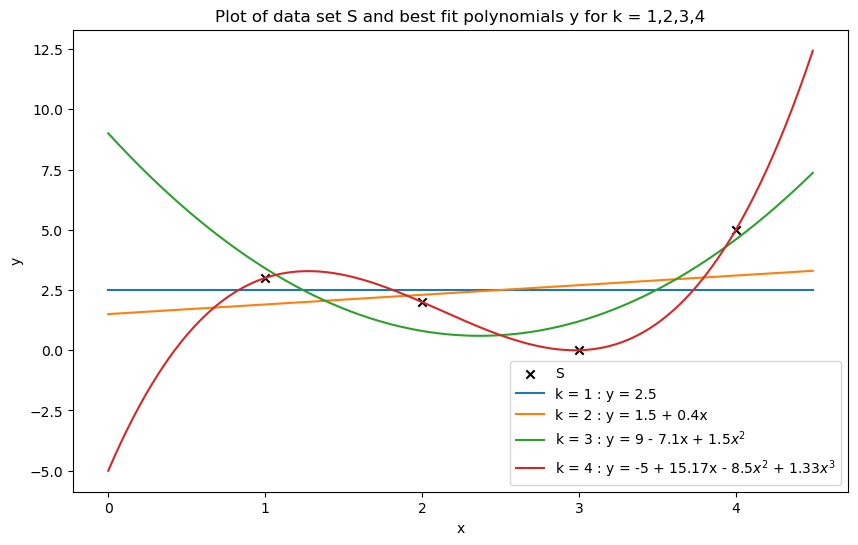

In [6]:
# Defining x_range with 100 values as inputs for curve plots
x_range = np.arange(0,4.5,0.01)

# Creating matplotlib pyplot plot for data set S, and curves y^(k) for k = 1,2,3,4
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Plot of data set S and best fit polynomials y for k = 1,2,3,4")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_0,y_0,color='black',marker='x')
plt.plot(x_range,poly(w_k(x_0,y_0,1),x_range))
plt.plot(x_range,poly(w_k(x_0,y_0,2),x_range))
plt.plot(x_range,poly(w_k(x_0,y_0,3),x_range))
plt.plot(x_range,poly(w_k(x_0,y_0,4),x_range))
plt.legend(['S', 'k = 1 : y = 2.5', 'k = 2 : y = 1.5 + 0.4x', 'k = 3 : y = 9 - 7.1x + 1.5$x^2$', 'k = 4 : y = -5 + 15.17x - 8.5$x^2$ + 1.33$x^3$'], loc ='best')
plt.show()

 
## Q1 Part (b) {-}

In [7]:
# For loop displaying the coefficients (weights w) for each polynomial for k = 1,2,3,4
for k in range(1,5):
    print("For k = ", k, ", coefficients are : ", w_k(x_0,y_0,k).T)

For k =  1 , coefficients are :  [[2.5]]
For k =  2 , coefficients are :  [[1.5 0.4]]
For k =  3 , coefficients are :  [[ 9.  -7.1  1.5]]
For k =  4 , coefficients are :  [[-5.         15.16666667 -8.5         1.33333333]]


The equations for the curves shown above are as follows (to 2 decimal places):

\begin{align*}
y^{(0)} &= 2.5\\
y^{(1)} &= 1.5 + 0.4x\\
y^{(2)} &= 9 - 7.1x + 1.5x^2\\
y^{(3)} &= -5 + 15.17x -8.5x^2 +1.33x^3
\end{align*}

 
## Q1 Part (c)  {-}

In [8]:
# Creating formula for Mean Square Error, with inputs X, y and dimension k
def MSE(X,y,k):
    
    # Defining no. of data points m
    m = len(y)
    
    # Creating PHI matrix from previous function
    PHI = phi_k(X,k)
    
    # Obtaining weights via psuedo-inverse function
    w = pinv(PHI)@y
    
    return 1/m * (PHI@w - y).T @(PHI@w-y)

In [9]:
# Looping over k values to calculate MSE
for k in range(1,5):
    print("k = ", k, ": MSE = ", MSE(x_0,y_0,k))

k =  1 : MSE =  [[3.25]]
k =  2 : MSE =  [[3.05]]
k =  3 : MSE =  [[0.8]]
k =  4 : MSE =  [[3.60746092e-27]]


The mean square errors ($MSE = \frac{SSE}{m}$) of each fitted curve $k = 1,2,3,4$ (with $m=4$), are as follows:
\begin{align*}
    MSE^{(1)} &= 3.25\\
    MSE^{(2)} &= 3.05\\
    MSE^{(3)} &= 0.8\\
    MSE^{(4)} &= 3.6 \times 10^{-27} \approx 0\\
\end{align*}
Note: This uses the formula for $SSE$ from above.

 
## Question 2  {-}

 
## Q2 Part (a)  {-}

We start with $g_\sigma(x) = \sin^2(2\pi x) + \epsilon$, with $\epsilon \sim N(0, \sigma^2)$.

In [10]:
def g(x,sd):
    return np.sin(2*np.pi*x)**2 + np.random.normal(0,sd,x.shape)

We then aim to create our sample training data set $S_{(0.07,30)} = \{(x_i, g_{\sigma}(x_i)\}$ for $i = (1, \cdots, 30)$ by using random $x_i$ and our function $g_{\sigma}$.

In [11]:
# Setting fixed random seed (42)
np.random.seed(42)

# Generating random sample of x_i of size 30, uniform from interval 0 to 1
X = np.random.random_sample(30).reshape(30,1)

# Generating output data using function g
G = g(X,0.07)

 
### Q2a  (i)  {-}

The below plot shows $sin^2(2\pi x)$ from $0 \leq x < 1$, alongside the scatter plot of the points of $S_{(0.07, 30)}$ generated by $g_\sigma (x)$.

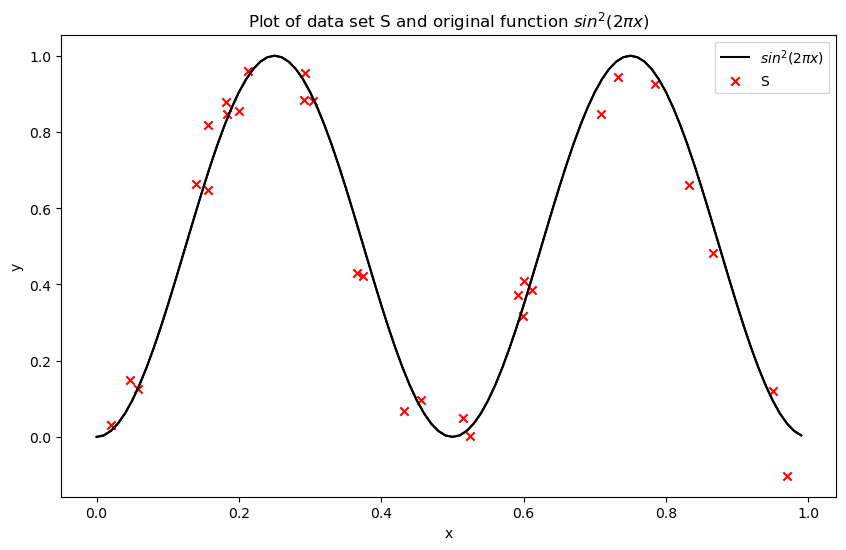

In [12]:
# Defining ranges for input and outputs via function g
x_range = np.arange(0,1,0.01)
y_range = g(x_range,0)

fig, ax = plt.subplots(figsize=(10,6))
plt.title("Plot of data set S and original function $sin^2(2\pi x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_range,y_range,color='0')
plt.scatter(X,G,color='r',marker='x')
plt.plot(x_range,y_range,color='0')
plt.legend(['$sin^2(2\pi x)$', 'S'], loc ='best')
plt.show()

 
### Q2a  (ii)  {-}

We now aim to fit this data set with polynomial bases of dimension $k = 2,5,10,14,18$, and plot the final polynomials on the same plot.

Below we identify the relevant weight coefficients $w$ for each dimension $k$.

In [13]:
# Looping over specific dimensions k to obtain coefficients for weights
for k in [2,5,10,14,18]:
    print("for k = ", k, ", weight coefficients are : ", w_k(X,G,k).T)

for k =  2 , weight coefficients are :  [[ 0.598554   -0.21457894]]
for k =  5 , weight coefficients are :  [[ -0.56124626  19.25229622 -83.63155576 128.85412991 -64.60948932]]
for k =  10 , weight coefficients are :  [[-2.32022595e-02  2.93620400e+00 -1.81874997e+01  5.87306900e+02
  -3.75797413e+03  9.47727766e+03 -1.06250056e+04  3.92666452e+03
   1.50313544e+03 -1.09675878e+03]]
for k =  14 , weight coefficients are :  [[-4.43955962e-01  4.51232136e+01 -1.51755782e+03  2.69685622e+04
  -2.71331826e+05  1.71425999e+06 -7.19727134e+06  2.06693932e+07
  -4.11100230e+07  5.65165049e+07 -5.26671220e+07  3.17412067e+07
  -1.11580605e+07  1.73694798e+06]]
for k =  18 , weight coefficients are :  [[ 5.59944919e-02 -3.99019528e+01  3.86960448e+03 -1.41399480e+05
   2.74929195e+06 -3.26998473e+07  2.58783894e+08 -1.43605845e+09
   5.77777399e+09 -1.72085501e+10  3.83749478e+10 -6.42703716e+10
   8.04102658e+10 -7.39940280e+10  4.85891688e+10 -2.15391047e+10
   5.77405815e+09 -7.06797562e+08]

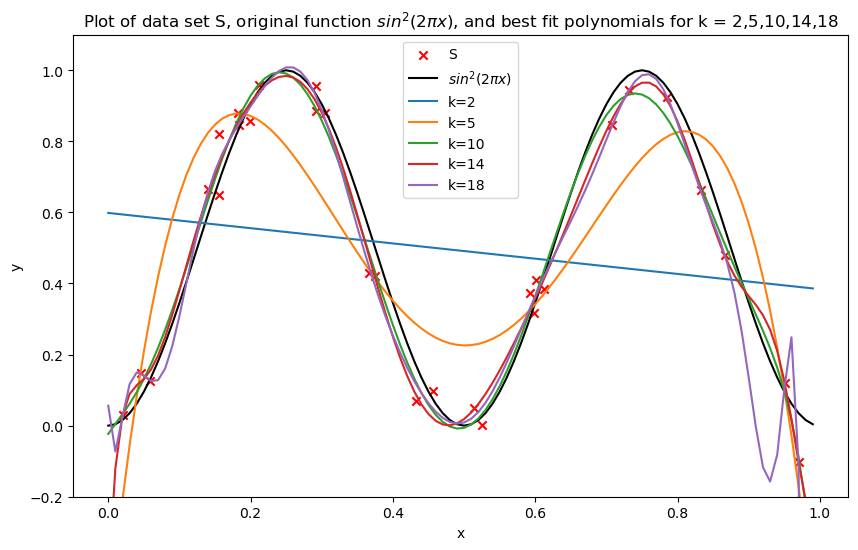

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(X,G,color='r',marker='x')
plt.title("Plot of data set S, original function $sin^2(2\pi x)$, and best fit polynomials for k = 2,5,10,14,18")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_range,y_range,color='0')
plt.plot(x_range,poly(w_k(X,G,2),x_range))
plt.plot(x_range,poly(w_k(X,G,5),x_range))
plt.plot(x_range,poly(w_k(X,G,10),x_range))
plt.plot(x_range,poly(w_k(X,G,14),x_range))
plt.plot(x_range,poly(w_k(X,G,18),x_range))
plt.ylim(-0.2,1.1)
plt.legend(['S', '$sin^2(2\pi x)$', 'k=2', 'k=5', 'k=10', 'k=14', 'k=18'], loc ='best')
plt.show()

We observe that as $k$ increases, the curve fits the data set $S$ better - almost too accurately, with $k = 18$ almost over-compensating to fit the points (overfitting), rather than resembling the $sin^2 (2\pi x)$ curve which the polynomial was aiming to generalise.

 
## Q2 Part (b)  {-}

We now aim to evaluate the training error $te_k(S) = MSE$ of these best fit polynomials.

In [15]:
# Creating function to calculate the natural log (ln) of the MSE of input data X, y and dimension k
def log_te_k(X,y,k):
    # Recalling the previously used MSE function
    return np.log(MSE(X,y,k))

The below plot shows the natural log of the training error (MSE) against the dimension $k = 1, \cdots, 18$, with the polynomial basis:

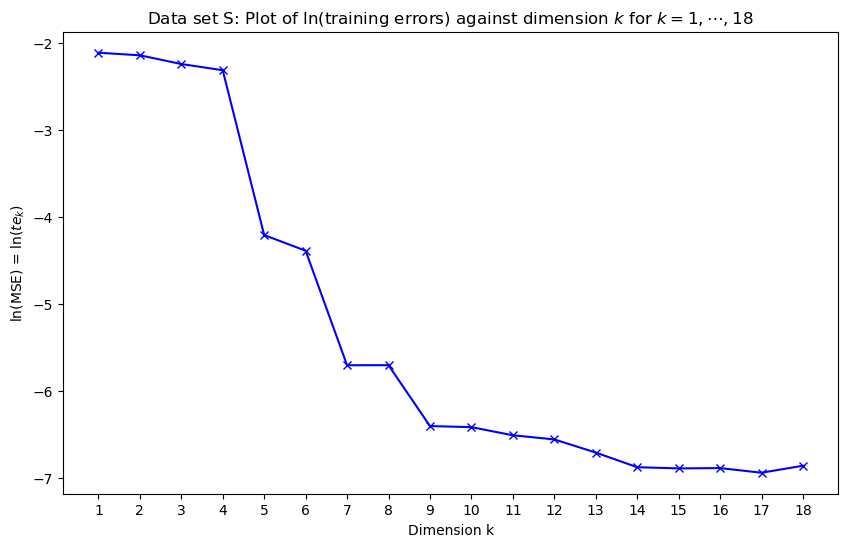

In [16]:
# Initialising the maximum value of k to be evaluated (18)
k_limit = 18

# Defining range of k values to be used
k_range = range(1,k_limit+1)

# Pre-allocating vector of stored ln(MSE) values
log_te_k_range = np.zeros(k_limit)

# Looping over each dimension k (index i)
for i in k_range:
    log_te_k_range[i-1] = log_te_k(poly(w_k(X,G,i),X),G,i)
    
# Plotting k_range against ln(MSE) vector
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Data set S: Plot of ln(training errors) against dimension $k$ for $k = 1, \cdots, 18$")
plt.xlabel("Dimension k")
plt.ylabel("ln(MSE) = $\ln(te_k)$")
plt.plot(k_range,log_te_k_range, 'xb-')
plt.xticks(k_range)
plt.show()

 
## Q2 Part (c)  {-}

We now generate 1000 test data points $T$ via the same random generation as $S$ before i.e. $T_{(0.07,1000)} = \{(x_i, g_{\sigma}(x_i)\}$ for $i = (1, \cdots, 1000)$.



In [17]:
# Setting random seed
np.random.seed(42)

# Generating 1000 random variables from standard uniform distribution, denoted as T for test data set
X_T = np.random.random_sample(1000).reshape(1000,1)

# Computing respective outputs g(x)
G_T = g(X_T,0.07)

Now we repeat the calculation of our errors, but instead now on the test data using the polynomials generated from the training data. Unlike the training error, this is not a decreasing function and indicates that the higher dimensional polynomials (in particular, $k = 16, 17, 18$) are subject to overfitting with this particular data set.

In [18]:
# Initialising the maximum value of k to be evaluated (18)
k_limit = 18

# Defining range of k values to be used
k_range = range(1,k_limit+1)

# Pre-allocating vector of stored ln(MSE) values
log_tse_k_range = np.zeros(k_limit)

# Looping over each dimension k (index i)
for i in k_range:
    log_tse_k_range[i-1] = log_te_k(poly(w_k(X,G,i),X_T),G_T,i)

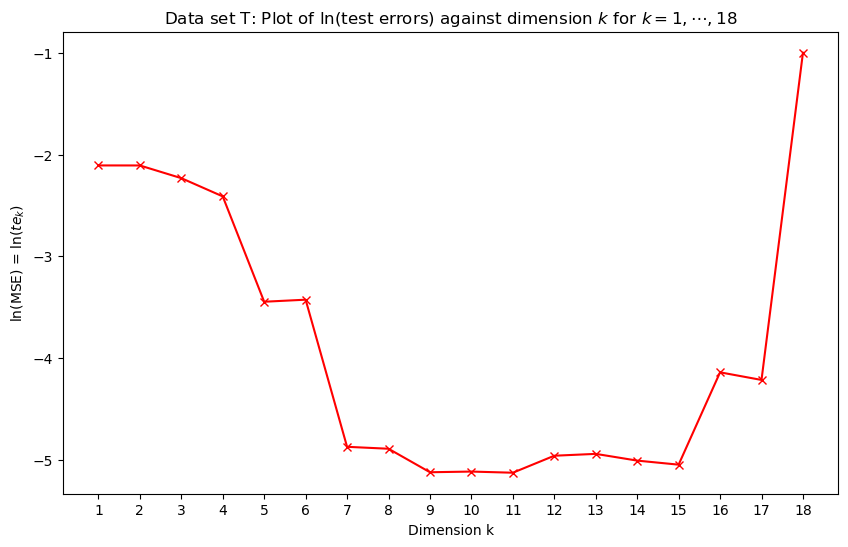

In [19]:
# Plotting k_range against ln(MSE) vector
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Data set T: Plot of ln(test errors) against dimension $k$ for $k = 1, \cdots, 18$")
plt.xlabel("Dimension k")
plt.ylabel("ln(MSE) = $\ln(te_k)$")
plt.plot(k_range, log_tse_k_range, 'xr-')
plt.xticks(k_range)
plt.show()

 
## Q2 Part (d)  {-}

We now repeat the above methods and average over 100 trials of the above experiments. This aims to negate any impact from the particular data set chosen in one single run, and isolates the impact of overfitting from the higher degree polynomials.

The below plot shows the natural log of both the training and test data's MSE, against the dimension $k = 1, \cdots, 18$. As expected, we see the training error as a decreasing function, whereas the test error appears to noticeably stabilise from $k=7$ onwards, and increase from $k=10$, suggesting that $k=7$ is the optimal dimension for the problem to minimise the MSE, whilst also keeping the model's ability to generalise and reduce overfitting by keeping the dimension low.

In [20]:
# Initialising the maximum value of k to be evaluated (18)
k_limit = 18

# Defining range of k values to be used
k_range = range(1,k_limit+1)

# Initialising number of trials (100)
N = 100

# Pre-allocating matrix of stored ln(MSE) values for train and test data, to be averaged afterwards (flattened)
te_k_avg = np.zeros((N,k_limit))
tse_k_avg = np.zeros((N,k_limit))

# For loop over each trial
for j in range(N):
    
    # Set random seed to vary per trial, but repeatable
    np.random.seed(j)
    
    # Generating random training sample of x_i of size 30, uniform from interval 0 to 1, with respective values of g(x)
    X = np.random.random_sample(30).reshape(30,1)
    G = g(X, 0.07)
    
    # Generating random test sample of x_i of size 1000, uniform from interval 0 to 1, with respective values of g(x)
    X_T = np.random.random_sample(1000).reshape(1000,1)
    G_T = g(X_T, 0.07)
    
    # Looping over values of k
    for i in k_range:
        
        # Calculating polynomial output for training and test data
        p = poly(w_k(X,G,i),X)
        p_T = poly(w_k(X,G,i),X_T)
        
        # Calculating MSE for training and test data
        te_k_avg[j,i-1] = MSE(p,G,i)
        tse_k_avg[j,i-1] = MSE(p_T,G_T,i)

# Averaging 100 MSE values for each dimension k, then taking ln()
log_te_k_avg = np.log(np.mean(te_k_avg,axis=0))
log_tse_k_avg = np.log(np.mean(tse_k_avg,axis=0))

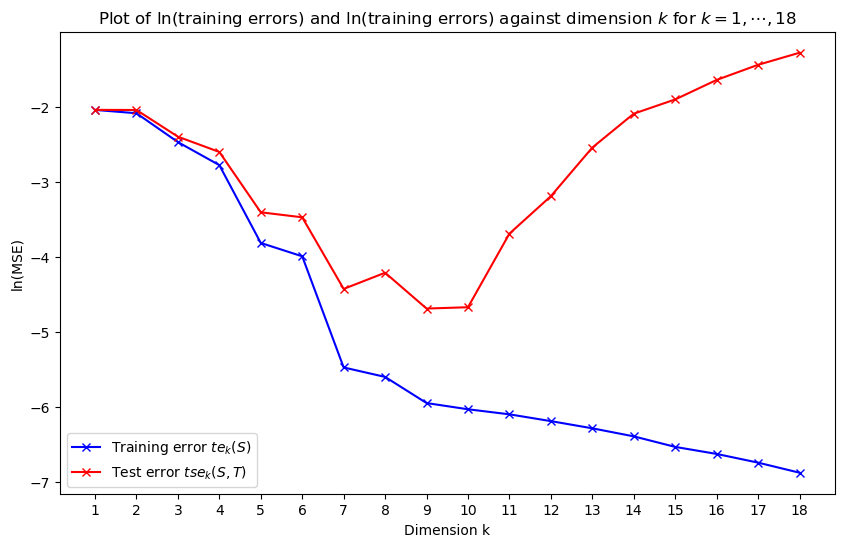

In [21]:
# Ploting ln(training errors) and ln(training errors) against dimension k
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Plot of ln(training errors) and ln(training errors) against dimension $k$ for $k = 1, \cdots, 18$")
plt.xlabel("Dimension k")
plt.ylabel("ln(MSE)")
plt.plot(k_range, log_te_k_avg, 'xb-')
plt.plot(k_range, log_tse_k_avg, 'xr-')
plt.legend(["Training error $te_k(S)$", "Test error $tse_k(S,T)$"], loc=3)
plt.xticks(k_range)
plt.show()

 
## Question 3  {-}

Now instead of the polynomial basis from before, we aim to use the following basis:

$$\{\sin(1\pi x), \ \sin(2\pi x), \ \sin(3\pi x), \ \cdots, \ \sin(k\pi x)\}$$

We repeat parts (b) and (c) with the above basis.

The below plot shows the natural log of the training error (MSE) against the dimension $k = 1, \cdots, 18$, with the sin basis:

In [22]:
# Altered Phi design matrix function with new sin basis
def phi_sin_k(x,k):
    
    # Pre allocation of design matrix
    A = np.array(np.zeros((x.shape[0], k)))
    
    # Looping over dimension k
    for i in range(k):
        # Adjusted function inputted to sin basis, noting that index starts at 1
        A[:,i:i+1] = np.sin((i+1)*np.pi*x)
    return A

In [23]:
# Adjusted function to compute weights w from new sin basis
def w_sin_k(X,y,k):
    return pinv(phi_sin_k(X,k)) @ y

In [24]:
# Adjusted MSE function which uses phi_sin_k instead
def MSE_sin(X,y,k):
    m = len(y)
    Phi = phi_sin_k(X,k)
    w = pinv(Phi)@y
    return 1/m * (Phi@w - y).T @(Phi@w-y)

In [25]:
# Adjusted polynomial output function to utilise sin basis, also noting index to start at 1
def poly_sin(p,x):
    return sum((a*np.sin((i+1)*np.pi*x) for i,a in enumerate(p)))

In [26]:
# Setting random seed
np.random.seed(42)

# Generating random training sample of x_i of size 30, uniform from interval 0 to 1, with respective values of g(x)
X = np.random.random_sample(30).reshape(30,1)
G = g(X,0.07)

# Initialising maximum k to use, alongside vector of k values
k_limit = 18
k_range = range(1,k_limit+1)

# Pre-allocation of ln(error) vector
log_te_k_range = np.zeros(k_limit)

# Looping over all k values
for i in k_range:
    # Replacing pre-allocation vector with training error from sin basis
    log_te_k_range[i-1] = log_te_k(poly_sin(w_sin_k(X,G,i),X),G,i)

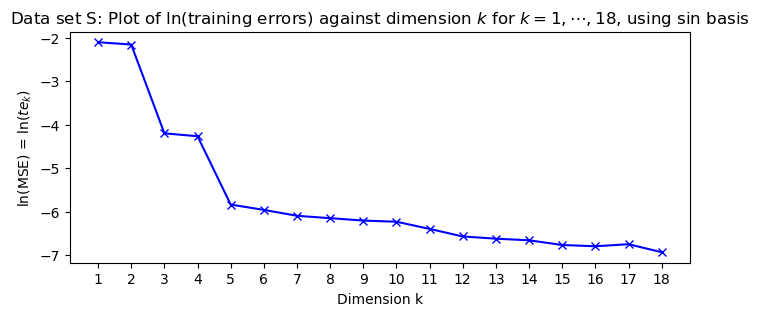

In [27]:
# Plotting k_range against ln(MSE) vector
fig, ax = plt.subplots(figsize=(8,3))
plt.title("Data set S: Plot of ln(training errors) against dimension $k$ for $k = 1, \cdots, 18$, using sin basis")
plt.xlabel("Dimension k")
plt.ylabel("ln(MSE) = $\ln(te_k)$")
plt.plot(k_range,log_te_k_range, 'xb-')
plt.xticks(k_range)
plt.show()

Now we compute the test error using the sin basis generated from the training data.

We generate our test data again, with 1000 entries. The below plot shows the natural log of the test MSE, against the dimension $k = 1, \cdots, 18$. We observe that the test error begins to noticeably increase towards larger values of $k$, for this particular data set.

In [28]:
# Setting random seed
np.random.seed(42)

# Generating 1000 random variables from standard uniform distribution, denoted as T for test data set
X_T = np.random.random_sample(1000).reshape(1000,1)

# Computing respective outputs g(x)
G_T = g(X_T,0.07)

# Initialising maximum k to use, alongside vector of k values
k_limit = 18
k_range = range(1,k_limit+1)

# Pre-allocation of ln(error) vector
log_tse_k_range = np.zeros(k_limit)

# Looping over all k values
for i in k_range:
    # Replacing pre-allocation vector with test error from sin basis
    log_tse_k_range[i-1] = log_te_k(poly_sin(w_sin_k(X,G,i),X_T),G_T,i)

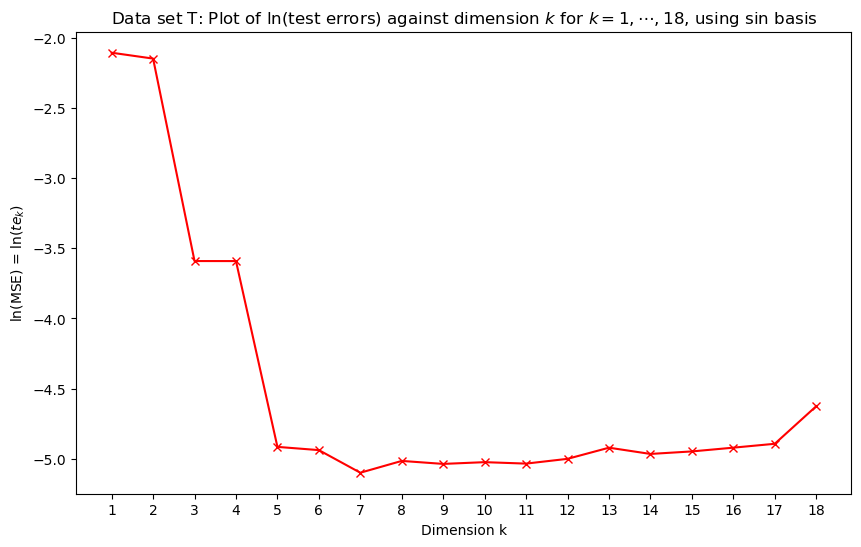

In [29]:
# Plotting k_range against ln(MSE) vector
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Data set T: Plot of ln(test errors) against dimension $k$ for $k = 1, \cdots, 18$, using sin basis")
plt.xlabel("Dimension k")
plt.ylabel("ln(MSE) = $\ln(te_k)$")
plt.plot(k_range, log_tse_k_range, 'xr-')
plt.xticks(k_range)
plt.show()

Now, we repeat the experiment 100 times and average over all trials.

The below plot shows the natural log of both training and test MSE against the dimension $k = 1, \cdots, 18$, averaged over 100 randomised data sets. We observe that, similar to the polynomial basis, the sin basis also exhibits overfitting as $k$ increases too far.

As an aside, one may argue that the optimal value of $k$ however is at $k=5$, which balances minimising the MSE and also overfitting. Since this is a lower complexity than the polynomial basis, this may suggest the sin basis as a more suitable basis for fitting the original curve. Perhaps this is not surprising, as the original curve was sinusoidal.

In [30]:
# Initialising the maximum value of k to be evaluated (18)
k_limit = 18

# Defining range of k values to be used
k_range = range(1,k_limit+1)

# Initialising number of trials (100)
N = 100

# Pre-allocating matrix of stored ln(MSE) values for train and test data, to be averaged afterwards (flattened)
te_k_avg = np.zeros((N,k_limit))
tse_k_avg = np.zeros((N,k_limit))

# For loop over each trial
for j in range(N):
    
    # Set random seed to vary per trial, but repeatable
    np.random.seed(j)
    
    # Generating random training sample of x_i of size 30, uniform from interval 0 to 1, with respective values of g(x)
    X = np.random.random_sample(30).reshape(30,1)
    G = g(X, 0.07)
    
    # Generating random test sample of x_i of size 1000, uniform from interval 0 to 1, with respective values of g(x)
    X_T = np.random.random_sample(1000).reshape(1000,1)
    G_T = g(X_T, 0.07)
    
    # Looping over values of k
    for i in k_range:
        
        # Calculating polynomial output for training and test data
        p_sin = poly_sin(w_sin_k(X,G,i),X)
        p_sin_T = poly_sin(w_sin_k(X,G,i),X_T)

        # Calculating MSE for training and test data
        te_k_avg[j,i-1] = MSE(p_sin,G,i)
        tse_k_avg[j,i-1] = MSE(p_sin_T,G_T,i)

# Averaging 100 MSE values for each dimension k, then taking ln()
log_te_k_avg = np.log(np.mean(te_k_avg,axis=0))
log_tse_k_avg = np.log(np.mean(tse_k_avg,axis=0))

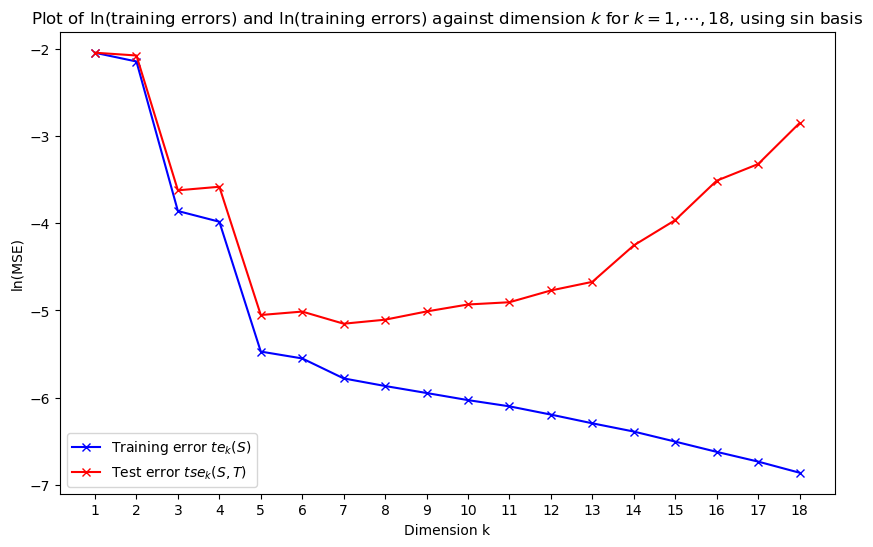

In [31]:
# Ploting ln(training errors) and ln(training errors) against dimension k
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Plot of ln(training errors) and ln(training errors) against dimension $k$ for $k = 1, \cdots, 18$, using sin basis")
plt.xlabel("Dimension k")
plt.ylabel("ln(MSE)")
plt.plot(k_range, log_te_k_avg, 'xb-')
plt.plot(k_range, log_tse_k_avg, 'xr-')
plt.legend(["Training error $te_k(S)$", "Test error $tse_k(S,T)$"], loc=3)
plt.xticks(k_range)
plt.show()

 
## Filtered Boston housing and kernels

 
## Question 4  {-}

In [32]:
# Importing filtered Boston housing dataset via Pandas
df = pd.read_csv('Boston-filtered.csv', header= 0)

In [33]:
# Initialise summary table of results for Q5d
summary = np.zeros((15,4))

In [34]:
# First we define a function to split a dataset into training and test data with a given training split
# We aim to avoid scikit-learn's function

# Creating custom train-test function, similar to scikit-learns function
def my_train_test_split(df, train_ratio):
    
    # Storing no. of data points
    N = df.shape[0]
    
    # Randomising order of dataframe rows
    df = df.sample(frac=1)
    
    # Setting the first 2/3rds of rows as training data, last 1/3 to be test data
    train = df[0:round(N*train_ratio)]
    test = df[round(N*train_ratio):]
    
    # Splitting into input and output data, whilst resetting indexes
    x_train = train.iloc[:,:-1].reset_index(drop=True)
    y_train = train.iloc[:,-1:].reset_index(drop=True)
    x_test = test.iloc[:,:-1].reset_index(drop=True)
    y_test = test.iloc[:,-1:].reset_index(drop=True)
    
    return x_train, y_train, x_test, y_test

 
## Q4 Part (a)  {-}

First, we set our training ratio as 2/3, prior to splitting the Boston housing data set. We aim to perform a naive linear regression (a constant function) over the data set.

In [35]:
# Initialise ratio of train-test data (2/3, 1/3)
X_ratio = 2/3

# Setting random seed to provide randomised yet repeatable train-test splits
np.random.seed(42)

# Calling my_train_test_split function
x_train, y_train, x_test, y_test = my_train_test_split(df, X_ratio)

# Storing size of train and test data
N_train = len(x_train)
N_test = len(x_test)

# Defining naive vector of ones
naive_train_vec = np.ones(N_train).T.reshape(N_train,1)

# Computing weight of naive vector
w = pinv(naive_train_vec) @ y_train

In [36]:
# Computing Mean Square Error for naive regression, looping over 20 trials:

# Pre-allocation of MSE vectors, to average later
MSE_train_vec = np.zeros(20)
MSE_test_vec = np.zeros(20)

for i in range(20):
    
    # Setting random seed
    np.random.seed(i)
    
    # Calling my_train_test_split function
    x_train, y_train, x_test, y_test = my_train_test_split(df, X_ratio)

    # Storing size of train and test data
    N_train = len(x_train)
    N_test = len(x_test)
    
    # Defining naive vector of ones for train and test data
    naive_train_vec = np.ones(N_train).T.reshape(N_train,1)
    naive_test_vec = np.ones(N_test).T.reshape(N_test,1)

    # Computing weight of naive vector
    w = np.array(pinv(naive_train_vec) @ y_train)

    # MSE formula
    MSE_train_vec[i] = 1/N_train * (naive_train_vec@w - y_train.to_numpy()).T @(naive_train_vec@w - y_train.to_numpy())
    MSE_test_vec[i] = 1/N_test * (naive_test_vec@w - y_test.to_numpy()).T @(naive_test_vec@w - y_test.to_numpy())

# Calculating mean MSE over 20 trials for train and test data
MSE_train_naive = np.mean(MSE_train_vec)
MSE_test_naive = np.mean(MSE_test_vec)

# Calculating MSE st dev over 20 trials for train and test data
MSE_train_naive_std = np.std(MSE_train_vec)
MSE_test_naive_std = np.std(MSE_test_vec)

# Filling summary table results for Q5d
summary[(0,0)] = MSE_train_naive
summary[(0,1)] = MSE_train_naive_std
summary[(0,2)] = MSE_test_naive
summary[(0,3)] = MSE_test_naive_std

print('Learning via Naive Regression:')
print('Training MSE =', MSE_train_naive)
print('Test MSE =', MSE_test_naive)
print('Training MSE st dev =', MSE_train_naive_std)
print('Test MSE st dev =', MSE_test_naive_std)

Learning via Naive Regression:
Training MSE = 84.54296306210321
Test MSE = 84.47043682903508
Training MSE st dev = 5.3890022682516365
Test MSE st dev = 10.755627598995622


Looping over 20 runs, we identify the MSE of the training and test data sets and note them below:

$$\begin{array}{lcc}
\text{Model} & \text{Train MSE} & \text{Test MSE} \\
\hline
\text{Naive Regression} & 84.542963 \pm 5.389002
& 84.470437 \pm 10.755627 \\
\end{array}$$

 
## Q4 Part (b)  {-}

The constant function in part (a) is simply the mean of the $y_{train}$ data, for a particular run. It is the bias term on its own, with no dependence on values of $x_i$ from the original data set.

 
## Q4 Part (c)  {-}

Now we perform a linear regression with a single attribute/feature $x_i$, for $i = 1, \cdots, 12$. We augment the design matrix with an appended column vector $\mathbf{1}$, to act as the bias term.

In [37]:
# Initialise ratio of train-test data (2/3, 1/3)
X_ratio = 2/3

# Setting random seed to provide randomised yet repeatable train-test splits
np.random.seed(42)

# Looping over each feature from the original dataset
for j in range(12):

    # Pre-allocation of MSE vectors, to average later
    MSE_train_vec = np.zeros(20)
    MSE_test_vec = np.zeros(20)

    for i in range(20):

        # Setting random seed
        np.random.seed(i)

        # Calling my_train_test_split function
        x_train, y_train, x_test, y_test = my_train_test_split(df, X_ratio)

        # Storing size of train and test data
        N_train = len(x_train)
        
        N_test = len(x_test)

        # Defining naive vector of ones for train and test data
        design_train = np.ones((N_train,2))
        design_train[:,1] = x_train.iloc[:,j]
        design_test = np.ones((N_test,2))
        design_test[:,1] = x_test.iloc[:,j]

        # Computing weight of naive vector
        w = np.array(pinv(design_train) @ y_train)

        # MSE formula
        MSE_train_vec[i] = 1/N_train * (design_train@w - y_train.to_numpy()).T @(design_train@w - y_train.to_numpy())
        MSE_test_vec[i] = 1/N_test * (design_test@w - y_test.to_numpy()).T @(design_test@w - y_test.to_numpy())

    # Calculating mean MSE over 20 trials for train and test data
    MSE_train = np.mean(MSE_train_vec)
    MSE_test = np.mean(MSE_test_vec)
    
    # Calculating MSE st dev over 20 trials for train and test data
    MSE_train_std = np.std(MSE_train_vec)
    MSE_test_std = np.std(MSE_test_vec)
    
    # Filling summary table results for Q5d
    summary[(j+1,0)] = MSE_train
    summary[(j+1,1)] = MSE_train_std
    summary[(j+1,2)] = MSE_test
    summary[(j+1,3)] = MSE_test_std

Below we see the MSE of the training and test data sets, averaged over 20 runs with random 2/3 training splits, for linear regression with single attributes and a bias term.

$$\begin{array}{lcccc}
\text{Method} & \text{MSE Train} & \text{MSE Train}\\
\hline
\text{CRIM} & 71.249285 \pm 4.894360 & 73.912137 \pm 10.400258 \\
\text{ZN} & 74.193390 \pm 4.343447 & 72.383101 \pm 8.770823 \\
\text{INDUS} & 64.915538 \pm 4.346531 & 64.559712 \pm 8.850307 \\
\text{CHAS} & 82.016892 \pm 5.122321 & 82.193061 \pm 10.622458 \\
\text{NOX} & 69.475862 \pm 4.445054 & 68.482824 \pm 8.976575 \\
\text{RM} & 43.357060 \pm 3.017401 & 44.461120 \pm 5.905816 \\
\text{AGE} & 72.685168 \pm 4.813339 & 72.258942 \pm 9.676213 \\
\text{DIS} & 79.438796 \pm 5.261917 & 78.976766 \pm 10.544300 \\
\text{RAD} & 71.928464 \pm 4.883926 & 73.079478 \pm 9.851037 \\
\text{TAX} & 65.587031 \pm 4.484588 & 66.968100 \pm 9.016871 \\
\text{PTRATIO} & 62.350071 \pm 3.989596 & 63.832678 \pm 8.089564 \\
\text{LSTAT} & 38.698006 \pm 2.333831 & 38.504028 \pm 4.631252 \\
\end{array}$$

 
## Q4 Part (d)  {-}

Now we aim to implement Linear regression using all attributes.

In [38]:
# Initialise ratio of train-test data (2/3, 1/3)
X_ratio = 2/3

# Setting random seed to provide randomised yet repeatable train-test splits
np.random.seed(42)

# Pre-allocation of MSE vectors, to average later
MSE_train_vec = np.zeros(20)
MSE_test_vec = np.zeros(20)

for i in range(20):

    # Setting random seed
    np.random.seed(i)

    # Calling my_train_test_split function
    x_train, y_train, x_test, y_test = my_train_test_split(df, X_ratio)

    # Storing size of train and test data
    N_train = len(x_train)

    N_test = len(x_test)

    # Defining naive vector of ones for train and test data
    design_train = np.concatenate((np.ones((N_train,1)),x_train.to_numpy()),axis=1)
    design_test = np.concatenate((np.ones((N_test,1)),x_test.to_numpy()),axis=1)

    # Computing weight of naive vector
    w = np.array(pinv(design_train) @ y_train)

    # MSE formula
    MSE_train_vec[i] = 1/N_train * (design_train@w - y_train.to_numpy()).T @(design_train@w - y_train.to_numpy())
    MSE_test_vec[i] = 1/N_test * (design_test@w - y_test.to_numpy()).T @(design_test@w - y_test.to_numpy())

# Calculating mean MSE over 20 trials for train and test data
MSE_train_all = np.mean(MSE_train_vec)
MSE_test_all = np.mean(MSE_test_vec)

# Calculating MSE st dev over 20 trials for train and test data
MSE_train_all_std = np.std(MSE_train_vec)
MSE_test_all_std = np.std(MSE_test_vec)

# Filling summary table results for Q5d
summary[(13,0)] = MSE_train_all
summary[(13,1)] = MSE_train_all_std
summary[(13,2)] = MSE_test_all
summary[(13,3)] = MSE_test_all_std

print('Learning on all attributes:')
print('Training MSE =', MSE_train_all)
print('Test MSE =', MSE_test_all)
print('Training MSE st dev =', MSE_train_all_std)
print('Test MSE st dev =', MSE_test_all_std)

Learning on all attributes:
Training MSE = 22.27992076512352
Test MSE = 23.975248452710765
Training MSE st dev = 1.6494534616428034
Test MSE st dev = 3.5857234371489777


$$\begin{array}{lcccc}
\text{Method} & \text{MSE Train} & \text{MSE Train}\\
\hline
\text{All Attributes} & 22.279921 \pm 1.649453 & 23.975248 \pm 3.585723 \\
\end{array}$$

Evidently, the MSE for linear regression on all attributes significantly outperforms the results from part (c) where we only trained on an individual attribute.

 
## Kernelised Ridge Regression

 
## Question 5 {-}

We aim to perform kernel ridge regression (KRR) on the data set using the following Gaussian kernel:

$$K(\mathbf{x}_i,\mathbf{x}_j) = exp\left(-\frac{||\mathbf{x}_i-\mathbf{x}_j||^2}{2\sigma^2}\right)$$

We set out our parameters $\gamma$ and $\sigma$ to prepare a grid search on the optimal pairing to minimise the training MSE, with the $\gamma$ values being $[2^{-40}, 2^{-39}, \cdots, 2^{-26}]$ and the $\sigma$ values being $[2^7, 2^{7.5}, \cdots, 2^{13}]$




 
## Q5 Part (a) {-}

In [39]:
# Defining Gaussian kernel function
def K_gaussian_kernel(x_i,x_j,s):
    return np.exp(-(np.linalg.norm(x_i - x_j))/(2*s**2))

In [40]:
# Creating gamma and sigma vectors, preparing for grid search
gamma = np.zeros(15)
for i in range(15):
    gamma[i] = 2**(-40+i)

sigma = np.zeros(13)
for i in range(13):
    sigma[i] = 2**(7+i/2)

In [41]:
def K_mat(x_train, x_test, s):
    # Broadcasting to calculate norms for all combinations
    norms = np.linalg.norm(x_train.values[:, np.newaxis] - x_test.values, axis=-1)
    
    # Applying the Gaussian kernel function to compute the K matrix
    K = np.exp(-norms / (2 * s**2))
    
    return K

In [42]:
# Function to compute alpha star (dual optimisation formulation after kernelisation)
def alpha_star(gamma, sigma, x_train, y_train):
    
    l_train = x_train.shape[0]
    
    K = K_mat(x_train, x_train, sigma)
    
    alpha = np.linalg.inv(K + gamma * l_train * np.eye(l_train)) @ y_train
    return alpha

In [43]:
# Function to evaluate the regression function on a test point
def y_pred_func(alpha_star, x_train, x_test, sigma):
    return K_mat(x_train, x_test, sigma).T @ alpha_star

In [44]:
# Mean square error function
def mean_se(y_pred, y_test):
    return np.square(y_pred - y_test).mean()

In [45]:
# 5-fold cross validation on the training data, given gamma and sigma
def five_fold_cross_validation(x_train, y_train, gamma, sigma):

    # Splitting training data into 5 separate arrays
    A, B, C, D, E = np.array_split(x_train,5)
    x_train_5f = [A,B,C,D,E]

    Ay, By, Cy, Dy, Ey = np.array_split(y_train,5)
    y_train_5f = [Ay,By,Cy,Dy,Ey]

    # Initialise 5 mse values to average later
    mse = np.zeros(5)

    # looping over a different choice of x_train_5f as the validation set
    for i in range(5):

        # Selecting one fifth of training data as validation set
        x_train_val =  pd.concat(x_train_5f[:i] + x_train_5f[i+1:])
        x_val = x_train_5f[i]

        y_train_val =  pd.concat(y_train_5f[:i] + y_train_5f[i+1:])
        y_val = y_train_5f[i]
        
        # Computing y_pred from y_pred_func and all associated inputs on training data
        y_pred = y_pred_func(alpha_star(gamma, sigma, x_train_val, y_train_val), x_train_val, x_val, sigma)
        
        # Storing MSE value for one fold
        mse[i] = mean_se(y_pred.reset_index(drop=True), y_val.reset_index(drop=True))

    # Returning mean of MSEs of all 5 folds
    return mse.mean()

In [46]:
# Initialise ratio of train-test data (2/3, 1/3)
X_ratio = 2/3

# Setting random seed to provide randomised yet repeatable train-test splits
np.random.seed(10)

# Calling my_train_test_split function
x_train, y_train, x_test, y_test = my_train_test_split(df, X_ratio)

In [47]:
# Initialising matrix to input MSE values for corresponding gamma and sigma
GS = np.zeros((len(gamma),len(sigma)))

# Looping 5 fold cross val over all possible gamma and sigma values
for i in range(len(gamma)):
    for j in range(len(sigma)):
        
        # Computing mean MSE of training data on particular gamma and sigma across 5 folds
        mse = five_fold_cross_validation(x_train, y_train, gamma[i], sigma[j])
        
        # Assigning MSE to gamma-sigma grid search matrix
        GS[i,j] = mse

In [48]:
# Identifying lowest MSE obtained, by which hyperparams
argmin = np.unravel_index(GS.argmin(), GS.shape)
best_cross_val_MSE = GS.min()

# Defining the best gamma and sigma from training
gamma_star = gamma[argmin[0]]
sigma_star = sigma[argmin[1]]

print('gamma_star = ', gamma_star, ' = 2^',np.log2(gamma_star))
print('sigma_star = ', sigma_star, ' = 2^',np.log2(sigma_star))

gamma_star =  2.9103830456733704e-11  = 2^ -35.0
sigma_star =  8192.0  = 2^ 13.0


From this particular run, the $\gamma$ and $\sigma$ which performed the best are:

$$\begin{array}{ll}
\gamma^* & \sigma^* \\
\hline
2^{-35} & 2^{13} \\
\end{array}$$

 
## Q5 Part (b) {-}

The following 3D plot shows the mean cross validation error as a function of $\gamma$ and $\sigma$ from the parameter grid search.

It is to be noted that the minimum point $(\gamma^*, \sigma^*) = (2^{-35}, 2^{13})$ is not an obvious minimum point from the plot, as the surface appears somewhat uniform throughout a lot of the grid. On a different seed, the optimal parameters may change, however the optimal MSE should not differ too much.

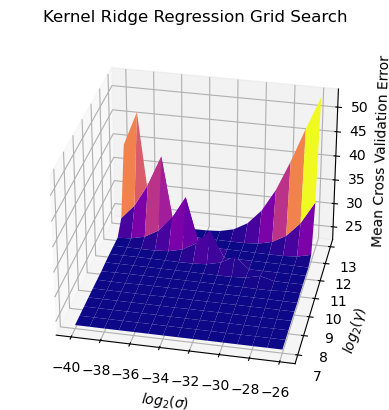

In [54]:
# Creating meshgrid to create cross-validation error graph
gg, ss = np.meshgrid(gamma,sigma)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(np.log2(gg), np.log2(ss),  GS.reshape(gg.shape), cmap="plasma")
ax.set_xlabel(f'$log_2(\sigma)$')
ax.set_ylabel(f'$log_2(\gamma)$')
ax.view_init(30, -78)
ax.set_title('Kernel Ridge Regression Grid Search')
ax.set_zlabel('Mean Cross Validation Error');

 
## Q5 Part (c) {-}

Now we aim to retrain our model with the optimal parameters $(\gamma^*, \sigma^*) = (2^{-35}, 2^{13})$, to compute the MSE of the training and test data sets.

In [50]:
# Initialise ratio of train-test data (2/3, 1/3)
X_ratio = 2/3

# Setting random seed to provide randomised yet repeatable train-test splits
np.random.seed(10)

# Calling my_train_test_split function
x_train, y_train, x_test, y_test = my_train_test_split(df, X_ratio)

# Using optimal gamma and sigma from training, predicting y on the test data
y_train_pred = y_pred_func(alpha_star(gamma_star, sigma_star, x_train, y_train), x_train, x_train, sigma_star)

# Calculating test MSE
train_MSE = mean_se(y_train_pred.reset_index(drop=True), y_train.reset_index(drop=True))

# Using optimal gamma and sigma from training, predicting y on the test data
y_pred = y_pred_func(alpha_star(gamma_star, sigma_star, x_train, y_train), x_train, x_test, sigma_star)

# Calculating test MSE
test_MSE = mean_se(y_pred.reset_index(drop=True), y_test.reset_index(drop=True))

print('gamma_star = ', gamma_star, ' = 2^',np.log2(gamma_star))
print('sigma_star = ', sigma_star, ' = 2^',np.log2(sigma_star))
print('Best train MSE = ', train_MSE[0])
print('Best test MSE = ', test_MSE[0])

gamma_star =  2.9103830456733704e-11  = 2^ -35.0
sigma_star =  8192.0  = 2^ 13.0
Best train MSE =  0.636859333420296
Best test MSE =  22.254673689594853


From this particular run, the overall training and test MSE are as follows:

$$\begin{array}{ll}
\text{Train MSE} & \text{Test MSE} \\
\hline
0.63859 & 22.25467 \\
\end{array}$$

 
## Q5 Part (d) {-}

We now aim to repeat Q5 parts (a) and (c) for Kernel Ridge Regression over 20 random splits of train and test data:

In [51]:
# Function to identify best hyperparameters with their MSE, given training data
def find_best_hyperparams(gamma, sigma, x_train, y_train):
    
    # Initialising matrix to input MSE values for corresponding gamma and sigma
    GS = np.zeros((len(gamma),len(sigma)))

    # Looping 5 fold cross val over all possible gamma and sigma values
    for i in range(len(gamma)):
        for j in range(len(sigma)):
            mse = five_fold_cross_validation(x_train, y_train, gamma[i], sigma[j])
            GS[i,j] = mse
            
    # Identifying lowest MSE obtained, by which hyperparams
    argmin = np.unravel_index(GS.argmin(), GS.shape)

    gamma_star = gamma[argmin[0]]
    sigma_star = sigma[argmin[1]]
    return gamma_star, sigma_star

In [55]:
# Function to use optimal gamma and sigma, calculating MSE
def find_performance(gamma_star, sigma_star, x_train, y_train, x_test, y_test):
    
    # Using optimal gamma and sigma from training, predicting y on the test data
    y_pred = y_pred_func(alpha_star(gamma_star, sigma_star, x_train, y_train), x_train, x_test, sigma_star)
    test_MSE = mean_se(y_pred.reset_index(drop=True), y_test.reset_index(drop=True))
    
    return test_MSE

In [56]:
# (Re-)Creating gamma and sigma vectors, preparing for grid search
gamma = np.zeros(15)
for i in range(15):
    gamma[i] = 2**(-40+i)

sigma = np.zeros(13)
for i in range(13):
    sigma[i] = 2**(7+i/2)

# Initialise ratio of train-test data (2/3, 1/3)
X_ratio = 2/3

# Pre-allocation of vectors of MSEs from training and testing, across 20 shuffles of training and test data
best_train_MSE_vec = np.zeros(20)
best_test_MSE_vec = np.zeros(20)

# Looping over 20 shuffles of training and test data
for q in range(20):
    
    # Fixed random seed for reproducibility
    np.random.seed(q)
    
    # Calling my_train_test_split function
    x_train, y_train, x_test, y_test = my_train_test_split(df, X_ratio)
    
    # Obtaining optimal gamma and sigma
    gamma_star, sigma_star = find_best_hyperparams(gamma, sigma, x_train, y_train)

    # Using optimal parameters to obtain train MSE
    best_train_MSE = find_performance(gamma_star, sigma_star, x_train, y_train, x_train, y_train)
    
    # Using optimal parameters to obtain test MSE
    test_MSE = find_performance(gamma_star, sigma_star, x_train, y_train, x_test, y_test)
    
    # Storing MSE values in pre-allocated vector
    best_train_MSE_vec[q] = best_train_MSE
    best_test_MSE_vec[q] = test_MSE

# Calculating mean MSE over 20 trials for train and test data
MSE_train_KRR = np.mean(best_train_MSE_vec)
MSE_test_KRR = np.mean(best_test_MSE_vec)

# Calculating MSE st dev over 20 trials for train and test data
MSE_train_KRR_std = np.std(best_train_MSE_vec)
MSE_test_KRR_std = np.std(best_test_MSE_vec)

# Filling summary table results for Q5d
summary[(14,0)] = MSE_train_KRR
summary[(14,1)] = MSE_train_KRR_std
summary[(14,2)] = MSE_test_KRR
summary[(14,3)] = MSE_test_KRR_std

print('Kernel Ridge Regression:')
print('Training MSE =', MSE_train_KRR)
print('Test MSE =', MSE_test_KRR)
print('Training MSE st dev =', MSE_train_KRR_std)
print('Test MSE st dev =', MSE_test_KRR_std)

Kernel Ridge Regression:
Training MSE = 0.7439263522274193
Test MSE = 20.636217926460397
Training MSE st dev = 0.9508613393556936
Test MSE st dev = 3.2779944934759992


$$\begin{array}{lcccc}
\text{Method} & \text{MSE Train} & \text{MSE Train}\\
\hline
\text{Kernel Ridge Regression} & 0.742936 \pm 0.950861 & 20.636218 \pm 3.277994 \\
\end{array}$$

Below we show the full summary table, displaying the training and test MSE of all methods used across Q4 and Q5: 

In [57]:
# Constructing summary table
headers = ['Training MSE', 'Training sd', 'Test MSE', 'Test sd']
row_labels = ['Naive Regression', 'CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'All Attributes', 'Kernel Ridge Regression']

summary_df = pd.DataFrame(summary, columns=headers, index=row_labels)

$$\begin{array}{lcccc}
\text{Method} & \text{MSE Train} & \text{MSE Train}\\
\hline
\text{Naive Regression} & 84.542963 \pm 5.389002 & 84.470437 \pm 10.755628 \\
\text{CRIM} & 71.249285 \pm 4.894360 & 73.912137 \pm 10.400258 \\
\text{ZN} & 74.193390 \pm 4.343447 & 72.383101 \pm 8.770823 \\
\text{INDUS} & 64.915538 \pm 4.346531 & 64.559712 \pm 8.850307 \\
\text{CHAS} & 82.016892 \pm 5.122321 & 82.193061 \pm 10.622458 \\
\text{NOX} & 69.475862 \pm 4.445054 & 68.482824 \pm 8.976575 \\
\text{RM} & 43.357060 \pm 3.017401 & 44.461120 \pm 5.905816 \\
\text{AGE} & 72.685168 \pm 4.813339 & 72.258942 \pm 9.676213 \\
\text{DIS} & 79.438796 \pm 5.261917 & 78.976766 \pm 10.544300 \\
\text{RAD} & 71.928464 \pm 4.883926 & 73.079478 \pm 9.851037 \\
\text{TAX} & 65.587031 \pm 4.484588 & 66.968100 \pm 9.016871 \\
\text{PTRATIO} & 62.350071 \pm 3.989596 & 63.832678 \pm 8.089564 \\
\text{LSTAT} & 38.698006 \pm 2.333831 & 38.504028 \pm 4.631252 \\
\text{All Attributes} & 22.279921 \pm 1.649453 & 23.975248 \pm 3.585723 \\
\text{Kernel Ridge Regression} & 0.742936 \pm 0.950861 & 20.636218 \pm 3.277994 \\
\end{array}$$


 
# PART II

 
## $k$-Nearest Neighbours

 
## Generating the data

 
## Question 6  {-}

In [58]:
class KNN:
    
    def __init__(self, X, y, k):
        self.X = X
        self.y = y
        self.k = k
    
    # Predict method for KNN
    def predict(self, X_other):
        
        # Calculate squared distances between data points
        distances = np.sum((X_other[:, np.newaxis] - self.X) ** 2, axis=2)
        
        # Find indices of the k smallest distances using argpartition
        indices = np.argpartition(distances, self.k, axis=1)[:, :self.k]
        
        # Predict labels based on the majority class of the k neighbors
        y_sum = np.sum(self.y[indices], axis=1)
        
        # Generating the label for ties at random
        ties = y_sum == self.k / 2
        random_predictions = np.random.randint(2, size=len(y_sum))
        
        y_pred = np.where(ties, random_predictions, y_sum > self.k / 2)
        return y_pred.astype(int)
    
    # Calculate generalisation error
    def error(self, y_pred, y_test):
        return np.mean(y_pred != y_test)
    
    # Plot decision boundary of KNN
    def plot_decision_regions(self):  
        
        # Step size in the mesh
        h = 0.02
        
        # Create color maps
        
        cmap_light = mc.ListedColormap(['white', 'teal'])
        cmap_bold = mc.ListedColormap(['olive', 'blue'])
        
        # Plot the decision boundary
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = self.predict(X_other=np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        
        # Plot also the training points
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap=cmap_bold)
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(f"2-Class classification (k = {self.k})")
        plt.show()

In [59]:
# Function to generate synthetic data without noise
def generate_sample(num_class, num_examples):
    
    # Generate 100 centers uniformly
    X = np.random.uniform(size=(num_examples, num_class))
    
    # Generate 100 uniform labels
    y = np.random.randint(0, num_class, num_examples)
    
    # Return data and labels
    return X, y

The below plot shows a visualisation of $h_{S,v}$ similar to Figure 1, with $|S| = 100$ and $v = 3$. Here, the white mapping is to 0 and the teal/turquoise mapping is to 1, with corresponding centers as olive/green and blue.

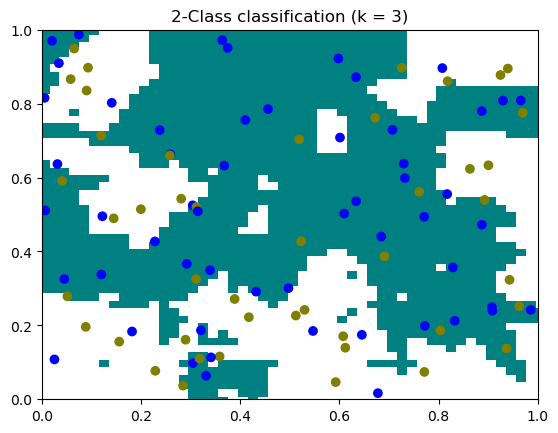

In [60]:
# Setting fixed random seed (42)
np.random.seed(42)

# Plot KNN region
S_h_data, S_h_labels = generate_sample(num_class=2, num_examples=100)
knn_region = KNN(X=S_h_data, y=S_h_labels, k=3)
knn_region.plot_decision_regions()

 
## Estimated generalisation error of $k$-NN as a function of $k$

 
## Question 7  {-}

In [61]:
# Function to add noise to the labels using KNN
def generate_sample_noise(X, y, n, proba, num_class, v):
    
    # Create KNN class (with v neighbors)
    knn = KNN(X=X, y=y, k=v)
    
    # Generate new data points
    X_new = np.random.uniform(size=(n, 2))
    
    # Generate binary noise labels
    y_update = (np.random.uniform(size=n) < proba).astype(int)
    
    # Predict labels for new data points using KNN
    y_new = knn.predict(X_new)
    
    # Add noise to labels based on y_update
    y_new[y_update == 0] = np.random.randint(0, 2, np.sum(y_update == 0))
    return X_new, y_new

In [62]:
# Function to execute Protocol A and calculate test error
def protocol_A(num_class, num_train, num_test, proba, v, k, seed):
    
    # Set the random seed for reproducibility
    np.random.seed(seed)
    
    # Generate synthetic data without noise
    data_no_noise, data_labels = generate_sample(num_class=num_class, num_examples=100)
    
    # Add noise to training data
    X_train, y_train = generate_sample_noise(X=data_no_noise, y=data_labels, n=num_train, proba=proba, num_class=num_class, v=v)
    
    # Add noise to test data
    X_test, y_test = generate_sample_noise(X=data_no_noise, y=data_labels, n=num_test, proba=proba, num_class=num_class, v=v)
    
    # Build KNN model with training data
    knn_model = KNN(X=X_train, y=y_train, k=k)
    
    # Predict labels for test data
    y_test_pred = knn_model.predict(X_other=X_test)
    
    # Calculate test error
    test_error = knn_model.error(y_pred=y_test_pred, y_test=y_test)
    return test_error

In [63]:
# Function to optimise Protocol A by running it multiple times
def protocol_A_optimiser(num_class, num_train, num_test, proba, v, k, num_iter):

    # Generate random seeds for each iteration
    seeds = np.random.randint(0, 10000, num_iter)
    
    # Use Parallel to parallelise Protocol A execution
    protocol_A_errors = Parallel(n_jobs=-1, verbose=0)(
        delayed(protocol_A)(num_class, num_train, num_test, proba, v, k, seed) for seed in seeds)
    return protocol_A_errors

 
## Q7 Part (a) {-}

In [64]:
# Set a fixed random seed for overall reproducibility
np.random.seed(7)

# Execute Protocol A
k_generalisation_error = [protocol_A_optimiser(num_class=2, num_train=4000, num_test=1000, proba=0.8, 
                                      v=3, k=k, num_iter=100) for k in range(1, 50, 1)]

The below plot shows the visualisation of Protocol A from Figure 2:

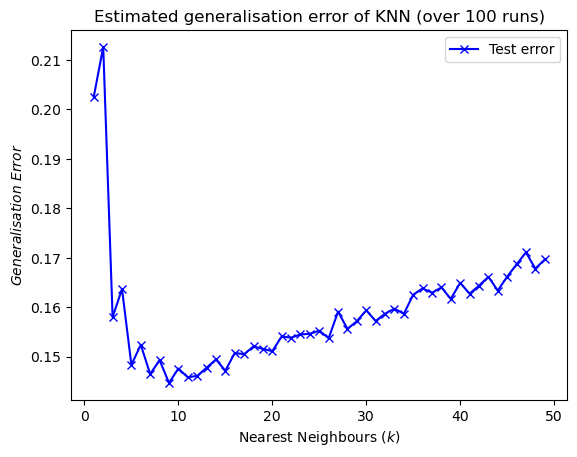

In [65]:
# Plot generalisation error
plt.title("Estimated generalisation error of KNN (over 100 runs)")
plt.ylabel("$Generalisation \ Error$")
plt.xlabel("Nearest Neighbours ($k$)")
plt.plot(np.arange(1, 50, 1), np.array(k_generalisation_error).mean(axis=1), "-xb", label="Test error")
plt.legend();
plt.show()

 
## Q7 Part (b) {-}

We notice an interesting observation that the plot resembles an 'elbow' or 'U-shaped' curve. From $k = 1$ to $k=5$, the generalisation error starts at a maximum and decreases rapidly to a minimum. From $k=5$ to $k=11$, the error appears to stabilise somewhat, with the actual minimum point at $k=9$, however this does not appear to be a robust minimum and could change with a different seed. From $k=11$ onwards, we see a gradual yet 'spiky' increase to $k=50$ and beyond.

For small $k$ (and hence large $\frac{m}{k}$), the error is large due to the model considering fewer neighbors, resulting in a complex, sensitive decision boundary that closely fits the training data, leading to overfitting with high variance and low bias.

For large $k$ (small $\frac{m}{k}$), the error is also high as the model considers more neighbors, creating a less complex decision boundary that struggles to capture underlying patterns, resulting in underfitting with low variance but high bias due to the 'Bias-Variance' tradeoff.

In between, there is a 'sweet spot' for an optimal $k$, at the minimum of the curve. However, even with a large $m = 4000$ and 100 iterations, there is still substantial noise at the minimum which still makes it difficult to identify an exact optimal $k$.

Another interesting observation includes that the visualisation appears to suggest a higher error for even values of $k$, compared to odd, especially at low $k$. This may be because even values of $k$ are prone to voting ties, especially with a sensitive decision boundary at lower $k$s. These ties are resolved by predicting labels uniformly at random, which may lead to a higher generalisation error at these even values of $k$.

 
## Question 8 {-}

In [66]:
# Function to execute Protocol B and find the optimal k
def protocol_B(num_class, num_iter, k_list, proba, num_train):
    
    # Use Parallel to parallelise Protocol A execution for different k values
    k_test_error_full = Parallel(n_jobs=-1, verbose=0)(
        delayed(protocol_A)(num_class, num_train, 1000, proba, 3, k, seed)for k in k_list for seed in range(num_iter))
    
    # Reshape the results for easier analysis
    k_test_error_full = np.array(k_test_error_full).reshape((len(k_list), num_iter))
    
    # Find the optimal k based on the mean test error
    optimal_k = k_list[np.argmin(np.mean(k_test_error_full, axis=1))]
    return optimal_k

In [67]:
# Function to optimise Protocol B by running it for different numbers of training points
def protocol_B_optimiser(num_class, num_train_list, num_iter, k_list, proba, v):
    
    # Use Parallel to parallelise Protocol B execution for different training points
    protocol_B_k = Parallel(n_jobs=-1, verbose=0)(
        delayed(protocol_B)(num_class, num_iter, k_list, proba, num_train) for num_train in num_train_list)
    
    return protocol_B_k

In [68]:
# Execute Protocol B
num_train_list = [100] + [500 * i for i in range(1, 9)]
optimal_k = protocol_B_optimiser(num_class=2, num_train_list=num_train_list, num_iter=100,
                                 k_list=np.arange(1, 50, 1), proba=0.8, v=3)

 
## Q8 Part (a) {-}

The below plot shows a visualisation of Protocol B, plotting the number of training points $m$ against the optimal $k$.

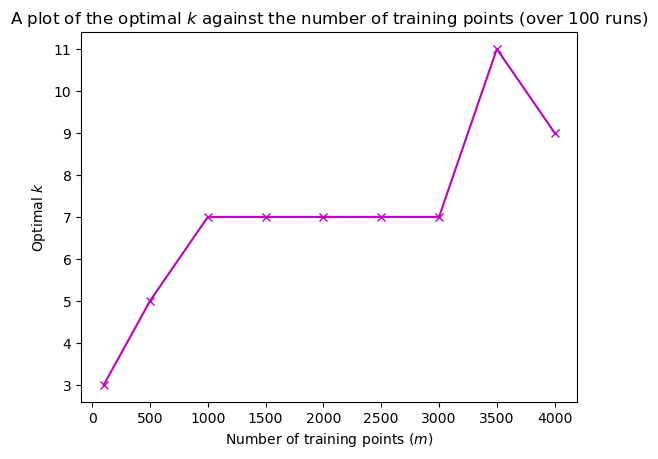

In [69]:
# Plot optimal k against the number of training points
plt.title("A plot of the optimal $k$ against the number of training points (over 100 runs)")
plt.ylabel("Optimal $k$")
plt.xlabel("Number of training points ($m$)")
plt.plot(num_train_list, optimal_k, "-xm")
plt.show()

 
## Q8 Part (b) {-}

The above figure indicates that as the number of training points $m$ increases, the optimal $k$ also increases, but at a decreasing rate and begins to converge to a consistent overall $k$.

This can be explained by the bias-variance tradeoff, where a small $m$ indicates that the model is sensitive to individual training points (overfitting), resulting in a smaller optimal $k$. As the training set size increases, there is more data to inhabit trends and patterns within the data, requiring a larger $k$ for better generalisation to capture this complexity. The curve eventually would plateau as eventually more data does not improve the model as much, leading to smaller increases in optimal $k$.

The curve is still suspect to high variation as displayed from the plot in Q7a, as the 'sweet spot' is still not robust and most values of $k$ from 5 to 11 appear to produce similar error values (even at $m = 4000$).

Theoretically, one can show that $\epsilon(k(m)\text{-NN}) \to \epsilon(f^*)$ as $m \to \infty$, provided that $k(m) \to \infty$ and $\frac{k(m)}{m} \to 0$, where $\epsilon(f^*)$ is the 'true error'. A well-known heuristic for $k(m)$ is $\sqrt{m}$ or even $\ln{m}$, however this depends on the nature of the dataset provided and the influence of noise, hence is hard to pinpoint.

 
# PART III

 
## Questions

 
## Question 9 {-}

 
## Q9 Part (a) {-}

Given the function $K_c(\mathbf{x},\mathbf{z}) := c + \sum_{k=1}^{n} x_k z_k$ where $\mathbf{x},\mathbf{z} \in \mathbb{R}^n$, we aim to find what values of $c \in \mathbb{R}$ is $K_c$ a positive semidefinite kernel.

$\textit{Claim: } c \geq 0$

$\textit{Proof: }$ We need to show:

$(1)$ Symmetry: $K_c(x, y) = K_c(y, x)$, for all $x, y$ in the domain

$(2)$ Positive Semidefinite Matrix: $\mathbf{v}^T G \mathbf{v} \geq 0$, for any $\mathbf{v} \in \mathbb{R}^n$ and $G$ is the matrix such that $G_{ij} = K_c(\mathbf{x_i},\mathbf{x_j})$, for all $x_1, x_2, \cdots, x_n$.

For $(1)$, we can show symmetry as follows:
\begin{align*}
K_c(\mathbf{x},\mathbf{z}) &= c + \sum_{i=1}^{n} x_i z_i\\
&= c + \sum_{i=1}^{n} z_i x_i\\
&= K_c(\mathbf{z},\mathbf{x})
\end{align*}

For $(2)$, we can show this as follows:

First consider $c \geq 0$ as true, we will now show $(2)$ to be true:

\begin{align*}
\mathbf{v}^T G \mathbf{v} &= \sum_{i, j}^n v_i K_c(\mathbf{x_i},\mathbf{x_j}) v_j \\
&= \sum_{i, j}^n v_i v_j (c + \sum_{k=1}^{n} x_{i,k} x_{j,k}) \\
&= c\sum_{i, j}^n v_i v_j + \sum_{i, j}^n \sum_{k=1}^n v_i x_{i,k} x_{j,k} v_j\\
&= c||\mathbf{v}||^2 + ||\sum_{k=1}^n v_k\mathbf{x_k}||^2
\end{align*}

The second term is positive as it is a square (as $\mathbf{a} \neq 0$), and the first term is non-negative if and only if $c \geq 0$, hence the RHS is $> 0$.

Secondly we consider $(2)$ as true and show $c \geq 0$ to be true, by contradiction:

Assume $c<0$. Consider $K_c(\mathbf{0},\mathbf{0}) = c < 0$ and $\mathbf{v} = \mathbf{1}$, which implies $\mathbf{v}^T G \mathbf{v}$ is not positive and $(2)$ does not hold for all values. Hence there is a contradiction and $c \geq 0$.

 
## Q9 Part (b) {-}

The parameter $c$ within this kernel function, acts as a 'bias' term for linear regression (least squares). It has a regularisation effect, where a larger $c$ can prevent overfitting by penalising large coefficients and making the model less sensitive to individual data points, whereas a smaller $c$ allows a more complex decision boundary and could also cause stability issues within the solution when computing a matrix inverse.

 
## Question 10 {-}

Given the Gaussian kernel
$K_\beta(\mathbf{x},\mathbf{t}) = \exp(-\beta||\mathbf{x}-\mathbf{t}||^2)$, we aim to understand how the parameter $\beta$ will enable the trained linear classifier to simulate a 1-NN classifier, where the label of the nearest data point is assigned to the given test point.

Our classifier takes the form $sign(f(\mathbf{t})$), with $f(\mathbf{t}) = \sum_{i=1}^m \alpha_i \exp(-\beta||\mathbf{x}-\mathbf{t}||^2)$. To simulate a 1-NN classifier, we want $f(\mathbf{t})$ to be influenced by the training point $\mathbf{x_{min}}$ which is closest to $\mathbf{t}$, and not to be influenced by any other training points.

Consider the limit as $\beta \to \infty$. The exponential term $\exp(-\beta||\mathbf{x}-\mathbf{t}||^2)$ will approach zero when $\mathbf{x} \neq \mathbf{t}$, and the training point $\mathbf{x_{min}}$ which is closest to $\mathbf{t}$ will have the largest contribution. The value of $\beta$ indicates the 'strength' of the isolation of the closest training point $x_i$, making the Gaussian kernel highly peaked, which is similar to the Dirac delta function ($\delta(x-y) = \infty$ when $x=y$ and $0$ otherwise) by its spike-like behaviour.

Therefore as $\beta \to \infty$, the classifier $f(\mathbf{t}) \to \alpha_{min} \exp(-\beta ||\mathbf{x_{min}}-\mathbf{t}||^2)$, since all other terms will tend to zero. This will mimic the nature of a 1-Nearest Neighbour classifier.

 
## Question 11 {-}

 
## Q11 Part (a) {-}

We first show that $\mathcal{E}_{\rho_i}(f_i) = 0$. We observe that: 


\begin{align*}
\mathcal{E}_{\rho_i}(f_i) &= \int_{\mathcal{C}\times\mathcal{Y}} \mathbf{1}\{{f_i(x)\neq y}\} d\rho_i \\
&= \int_{f_i(x)\neq y} \mathbf{1}\{{f_i(x)\neq y}\} d\rho_i + \int_{f_i(x) = y} \mathbf{1}\{{f_i(x)\neq y}\} d\rho_i 
\end{align*}

Here, the first integral is zero since $\rho_i = 0$ when $f_i(x) \neq y$, and the second integral is zero since $\mathbf{1}_{f_i(x)\neq y} = 0$ for the entire domain. Hence $\mathcal{E}_{\rho_i}(f_i) = 0$.

Next, we show $\inf_{f:\mathcal{X}\to\mathcal{Y}} \mathcal{E}_{\rho_i}(f) = 0$. We need to show that no other function $f$ can achieve a lower misclassification excess risk, however since $\mathbf{1}_{f_i(x)\neq y}$ is always zero when $f = f_i$, and $\rho_i$ is also always zero if and only if the prediction was misclassified, all terms are zero. There is no way for a negative excess risk, hence no other function can achieve a lower risk.

 
## Q11 Part (b) {-}

We aim to show: $$\max_{i = 1,\cdots,T} \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) \geq \min_{j = 1,\cdots,k} \frac{1}{T} \sum_{i=1}^T \mathcal{E}_{\rho_i}(A(S_j^i))$$

Taking inspiration from Hint 1, consider the LHS for each $i$, averaging over all $i$s (using the inequality in Hint 2 twice):

\begin{align*}
\max_{i = 1,\cdots,T} \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) \geq \frac{1}{T}\sum_{i=1}^T \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) &= \frac{1}{T}\sum_{i=1}^T \mathbb{E}_{S\sim\rho_i^n} \int_{\mathcal{C}\times\mathcal{Y}} \mathbb{1}\{{A(S)(x) \neq y}\} d\rho_i \\
&= \frac{1}{T} \sum_{i=1}^T \int_{\mathcal{C}\times\mathcal{Y}} \mathbb{E}_{S\sim\rho_i^n}\mathbb{1}\{{A(S_j^i)(x) \neq y}\} d\rho_i \\
&= \frac{1}{T} \sum_{i=1}^T \frac{1}{k} \sum_{j=1}^k \int_{\mathcal{C}\times\mathcal{Y}} \mathbb{1}\{{A(S_j^i)(x) \neq y}\} d\rho_i \\
&= \frac{1}{k} \sum_{j=1}^k \frac{1}{T} \sum_{i=1}^T \mathcal{E}_{\rho_i}(A(S_j^i)) \\
&\geq \min_{j=1,\cdots,k}\frac{1}{T} \sum_{i=1}^T \mathcal{E}_{\rho_i}(A(S_j^i)) \\
\end{align*}

 
## Q11 Part (c) {-}

We aim to show:
$$\frac{1}{T} \sum_{i=1}^T \mathcal{E}_{\rho_i}(A(S_j^i)) \geq \frac{1}{2} \min_{r=1,\cdots,p} \frac{1}{T} \sum_{i=1}^T \mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\}$$

First we consider the set $S'_j = \{v_1, \cdots, v_p\}$ and its corresponding misclassification risk:

\begin{align*}
\frac{1}{T} \sum_{i=1}^T \mathcal{E}_{\rho_i}(A(S_j^i)) &= \frac{1}{T} \sum_{i=1}^T \int_{{S'_j}\times\mathcal{Y}} \mathbb{1}\{{A(S_j^i)(v) \neq f_i(v)}\} d\rho_i(v,y)\\
&\geq \frac{1}{T} \sum_{i=1}^T \frac{1}{p} \sum_{r=1}^p \mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\} d\rho_i(v_r,y)\\
&\geq \frac{1}{2} \min_{r=1,\cdots,p} \frac{1}{T} \sum_{i=1}^T \mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\}
\end{align*}

 
## Q11 Part (d) {-}

We aim to show: $$\frac{1}{T} \sum_{i=1}^T \mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\} = \frac{1}{2}$$

We start with considering the expression:
$$\mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\} + \mathbb{1}\{{A(S_j^i)(v_r) \neq f_{i'}(v_r)}\}$$

Since $x = v_r$ in these expressions, we know $f_i(x) \neq f_{i'}(x)$, and since $f$ can only take 2 values $\{-1, 1\}$, we know exactly one of the terms in the expression will be 1, and the other 0.

Therefore we know:
$$\mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\} + \mathbb{1}\{{A(S_j^i)(v_r) \neq f_{i'}(v_r)}\} = 1$$
Now we take the sum from $i=1, \cdots, T$:
$$\sum_{i=1}^T\mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\} + \sum_{i=1}^T\mathbb{1}\{{A(S_j^i)(v_r) \neq f_{i'}(v_r)}\} = T$$
$$\frac{1}{T} \sum_{i=1}^T\mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\} = \frac{1}{2}$$

 
## Q11 Part (e)

We let $Z$ be a random variable with values in $[0,1]$ and $\mathbb{E}[Z] = \mu$. We aim to show that for any $a \in (0,1)$:
$$\mathbb{P}(Z>1-a) \geq \frac{u - (1-a)}{a}$$

Markov's Inequality states that for any non-negative random variable $X$ and any $a>0$:
$$\mathbb{P}(X\geq a) \leq \frac{\mathbb{E}[X]}{a}$$
We substitute $X = 1-Z$, which is permitted as $0\leq Z\leq1$ hence $X$ is still non-negative:

\begin{align*}
\mathbb{P}(1-Z\geq a) &\leq \frac{\mathbb{E}(1-Z)}{a}\\
\mathbb{P}(1-a\geq Z) &\leq \frac{1-\mu}{a}\\
1-\mathbb{P}(1-a< Z) &\leq \frac{1-\mu}{a}\\
\mathbb{P}(Z>1-a) &\geq 1-\frac{1-\mu}{a}\\
\mathbb{P}(Z>1-a) &\geq \frac{\mu - (1-a)}{a}
\end{align*}

 
## Q11 Part (f) {-}

Let $Z = \mathcal{E}_\rho(A(S))$ and $a=\frac{7}{8}$. This forms the equation:

\begin{align*}
\mathbb{P}_{S\sim\rho^n} \left(\mathcal{E}_\rho(A(S))>1-\frac{7}{8}\right) &\geq \frac{\mu-(1-\frac{7}{8})}{\frac{7}{8}}\\
\mathbb{P}_{S\sim\rho^n} \left(\mathcal{E}_\rho(A(S))>\frac{1}{8}\right) &\geq \frac{8 \cdot  \mathbb{E}_{S\sim\rho^n} \mathcal{E}_{\rho}(A(S))-1}{7}\\
\end{align*}

Combining parts (b), (c) and (d), we obtain the following inequality:
$$\max_{i = 1,\cdots,T} \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) \geq \min_{j = 1,\cdots,k} \frac{1}{T} \sum_{i=1}^T \mathcal{E}_{\rho_i}(A(S_j^i))$$

$$\frac{1}{T} \sum_{i=1}^T \mathcal{E}_{\rho_i}(A(S_j^i)) \geq \frac{1}{2} \min_{r=1,\cdots,p} \frac{1}{T} \sum_{i=1}^T \mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\}$$

$$\frac{1}{T} \sum_{i=1}^T \mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\} = \frac{1}{2}$$

Combining (b) and (c), we obtain:

$$\max_{i = 1,\cdots,T} \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) \geq \min_{j = 1,\cdots,k}  \frac{1}{2} \min_{r=1,\cdots,p} \frac{1}{T} \sum_{i=1}^T \mathbb{1}\{{A(S_j^i)(v_r) \neq f_i(v_r)}\}$$

Combining on (d), we obtain:

$$\max_{i = 1,\cdots,T} \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) \geq \min_{j = 1,\cdots,k}  \frac{1}{2} \min_{r=1,\cdots,p} \frac{1}{2}$$
$$\max_{i = 1,\cdots,T} \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) \geq \frac{1}{4}$$
$$\frac{1}{7} \left[8 \cdot \max_{i = 1,\cdots,T} \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) -1 \right] \geq \frac{1}{7}$$

We can deduce that there exists a probability distribution $\rho$ such that $\mathbb{E}_{S\sim\rho^n} \mathcal{E}_{\rho}(A(S)) \geq \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S))$, because we know $\mathcal{E}_{\rho_i}(f_i) = 0 = \inf_{f:\mathcal{X}\to\mathcal{Y}} \mathcal{E}_{\rho_i}(f) = 0$ from part (a).

Therefore, combining all results:
$$\mathbb{P}_{S\sim\rho^n} \left(\mathcal{E}_\rho(A(S))>\frac{1}{8}\right) \geq \frac{8 \cdot  \mathbb{E}_{S\sim\rho^n} \mathcal{E}_{\rho}(A(S))-1}{7} \geq
\frac{1}{7} \left[8 \cdot \max_{i = 1,\cdots,T} \mathbb{E}_{S\sim\rho_i^n} \mathcal{E}_{\rho_i}(A(S)) -1 \right] \geq \frac{1}{7}$$

Hence:
$$\mathbb{P}_{S\sim\rho^n} \left(\mathcal{E}_\rho(A(S))>\frac{1}{8}\right) \geq \frac{1}{7}$$

 
## Q11 Part (g) {-}

 
### Q11g  (i) {-}

#### No-Free-Lunch Theorem {-}

Let $\mathcal{X}$ be an input space, and $\mathcal{Y} = \{-1, 1\}$ be the output space. Denote $S = (x_i, y_i)_{i=1}^n$ be a dataset of $n$ input-output pairs.

For any algorithm $A: S \mapsto (f: \mathcal{X} \to \mathcal{Y})$ and any integer $n \in \mathbb{N}$, there exists a distribution $\rho$ over $\mathcal{X} \times \mathcal{Y}$, such that:
$\inf_{f:\mathcal{X}\to\mathcal{Y}} \mathcal{E}_\rho(f) = 0$ and $\mathbb{P}_{S\sim\rho^n} \left(\mathcal{E}_\rho(A(S))>\frac{1}{8}\right) \geq \frac{1}{7}$

The No-Free-Lunch Theorem for machine learning states that there is no universal algorithm which can perform optimally across all possible data sets or distributions. The effectiveness of a machine learning algorithm is strongly dependent on the underlying patterns of the provided data, and requires attention and understanding to select the appropriate algorithm for the particular task.

 
### Q11g  (ii) {-}

The No-Free-Lunch theorem implies that the space of all functions $\mathcal{Y}^{X}$ is not learnable, since this space includes every possible mapping from $\mathcal{X}$ to $\mathcal{Y}$, for any distribution $\rho$ and for any accuracy $\epsilon$ or confidence level $\delta$. The No-Free-Lunch theorem states that for any algorithm $A$, there exists a distribution $\rho$,  where the performance is suboptimal, referring to the accuracy $\epsilon$ and tolerance $\delta$.

The Learnability definition implies that there exists an optimal algorithm $A$ (achieving desired $\epsilon$ and $\delta$, but tailored to specific function spaces and data distributions. $\mathcal{Y}^{X}$ is not learnable as it is far too vast for an algorithm to perform desirably well on the space, which is implied by the NFL theorem.

 
### Q11g  (iii) {-}

The implications of the No-Free-Lunch theorem with respect to the design of a machine learning algorithm include the need for a context-aware approach to solving problems with machine learning. Whilst there is no universally optimal algorithm, it is important and beneficial to design algorithms by understanding the characteristics of the data and the context in which the problem is presented.